<a href="https://colab.research.google.com/github/guthi1/statistics-dump/blob/main/wine_testing_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Wine quality analysis

In [31]:
import pandas as pd
import numpy as np
import plotly.graph_objs as go
from plotly.offline import iplot
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import seaborn as sns

BASE_PATH = "/content/"

In [7]:
full_dataset = pd.read_csv(f"{BASE_PATH}wine_data.csv")

In [8]:
full_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   ID                    6497 non-null   int64  
 1   groupe                6497 non-null   object 
 2   Y_qualite             6497 non-null   int64  
 3    Z_qualite            6497 non-null   object 
 4    couleur              6497 non-null   object 
 5   fixed_acidity         6497 non-null   float64
 6   volatile_acidity      6497 non-null   float64
 7   citric_acid           6497 non-null   float64
 8   residual_sugar        6497 non-null   float64
 9   chlorides             6497 non-null   float64
 10  free_sulfur_dioxide   6497 non-null   float64
 11  total_sulfur_dioxide  6497 non-null   int64  
 12  density               6497 non-null   float64
 13  pH                    6497 non-null   float64
 14  sulphates             6497 non-null   float64
 15  alcohol              

In [10]:
full_dataset.head(5)

,ID,groupe,Y_qualite,Z_qualite,couleur,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol
0,1,train,5,OK,rouge,7.4,0.70,0.00,1.9,0.076,11.0,34,0.9978,3.51,0.56,9.4
1,2,validate,5,OK,rouge,7.8,0.88,0.00,2.6,0.098,25.0,67,0.9968,3.20,0.68,9.8
2,3,validate,5,OK,rouge,7.8,0.76,0.04,2.3,0.092,15.0,54,0.9970,3.26,0.65,9.8
3,4,train,6,OK,rouge,11.2,0.28,0.56,1.9,0.075,17.0,60,0.9980,3.16,0.58,9.8
4,5,train,5,OK,rouge,7.4,0.70,0.00,1.9,0.076,11.0,34,0.9978,3.51,0.56,9.4


In [14]:
feature_colum_names = ['fixed_acidity', 'volatile_acidity', 'citric_acid', 'residual_sugar', 'chlorides', 'free_sulfur_dioxide', 'total_sulfur_dioxide', 'density', 'pH', 'sulphates', 'alcohol']

## Spplit the data into training, valid and test set to check if the distribution are the same

In [12]:
# Split the data
train = full_dataset[full_dataset['groupe'] == 'train']
print(f'Amount of data point in train: {train.shape}')

valid = full_dataset[full_dataset['groupe'] == 'validate']
print(f'Amount of data point in valid: {valid.shape}')

test  = full_dataset[full_dataset['groupe'] == 'test']
print(f'Amount of data point in test : {test.shape}')


Amount of data point in train: (3916, 16)
Amount of data point in valid: (1317, 16)
Amount of data point in test : (1264, 16)


#### Training dataset

In [49]:
train_without_id = train[feature_colum_names + ['Y_qualite']]
valid_without_id = valid[feature_colum_names + ['Y_qualite']]
test_without_id  = test[feature_colum_names + ['Y_qualite']]

In [107]:
from google.colab import data_table
print("Train")
display(data_table.DataTable(train_without_id.describe().round(3), include_index=True, min_width="300"))
print("\nValid")
display(data_table.DataTable(valid_without_id.describe().round(3), include_index=True, min_width="300"))
print("\nTest")
display(data_table.DataTable(test_without_id.describe().round(3), include_index=True, min_width="300"))

Train


,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,Y_qualite
count,3916.000,3916.000,3916.000,3916.000,3916.000,3916.000,3916.000,3916.000,3916.000,3916.000,3916.000,3916.000
mean,7.224,0.340,0.319,5.481,0.056,30.566,115.653,0.995,3.218,0.534,10.505,5.836
std,1.318,0.163,0.146,4.750,0.035,17.428,56.411,0.003,0.162,0.148,1.204,0.871
min,3.900,0.080,0.000,0.600,0.009,1.000,7.000,0.987,2.720,0.230,8.000,3.000
25%,6.400,0.230,0.248,1.800,0.038,17.000,78.000,0.992,3.110,0.430,9.500,5.000
50%,7.000,0.295,0.310,3.000,0.047,29.000,118.000,0.995,3.200,0.510,10.300,6.000
75%,7.700,0.400,0.390,8.100,0.065,41.000,155.000,0.997,3.320,0.600,11.300,6.000
max,15.900,1.330,1.660,31.600,0.611,131.000,367.000,1.010,4.010,1.950,14.900,9.000



Valid


,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,Y_qualite
count,1317.000,1317.000,1317.000,1317.000,1317.000,1317.00,1317.000,1317.000,1317.000,1317.000,1317.000,1317.000
mean,7.164,0.336,0.317,5.446,0.056,30.55,116.341,0.995,3.221,0.527,10.505,5.828
std,1.241,0.163,0.142,4.880,0.036,17.76,55.246,0.003,0.161,0.149,1.189,0.884
min,4.400,0.090,0.000,0.600,0.012,1.00,6.000,0.987,2.740,0.220,8.600,3.000
25%,6.400,0.220,0.250,1.800,0.038,17.00,80.000,0.992,3.110,0.430,9.500,5.000
50%,7.000,0.290,0.310,3.100,0.048,29.00,119.000,0.995,3.210,0.500,10.300,6.000
75%,7.600,0.400,0.390,8.100,0.062,42.00,154.000,0.997,3.320,0.600,11.300,6.000
max,13.800,1.580,0.790,65.800,0.464,146.50,308.000,1.039,3.900,1.950,14.200,8.000



Test


,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,Y_qualite
count,1264.000,1264.000,1264.000,1264.000,1264.000,1264.000,1264.000,1264.000,1264.000,1264.000,1264.000,1264.000
mean,7.243,0.345,0.319,5.324,0.057,30.375,115.419,0.995,3.217,0.528,10.438,5.756
std,1.284,0.173,0.148,4.654,0.035,18.713,58.213,0.003,0.156,0.150,1.161,0.867
min,3.800,0.080,0.000,0.700,0.014,1.000,6.000,0.988,2.740,0.260,8.400,3.000
25%,6.400,0.230,0.250,1.800,0.039,16.000,75.000,0.992,3.110,0.430,9.500,5.000
50%,7.000,0.290,0.310,2.850,0.048,28.000,120.000,0.995,3.210,0.510,10.200,6.000
75%,7.725,0.410,0.390,8.100,0.066,42.000,158.000,0.997,3.320,0.600,11.200,6.000
max,15.500,1.240,1.000,26.050,0.610,289.000,440.000,1.003,4.010,2.000,14.000,9.000


In [52]:
print("Train")
display(train.pivot_table(feature_colum_names,['Y_qualite'], aggfunc='median'))
print("\nValid")
display(valid_without_id.pivot_table(feature_colum_names,['Y_qualite'], aggfunc='median'))
print("\nTest")
display(test_without_id.pivot_table(feature_colum_names,['Y_qualite'], aggfunc='median'))

Train


,alcohol,chlorides,citric_acid,density,fixed_acidity,free_sulfur_dioxide,pH,residual_sugar,sulphates,total_sulfur_dioxide,volatile_acidity
Y_qualite,,,,,,,,,,,
3,9.95,0.053,0.34,0.996000,7.5,16.0,3.240,4.60,0.510,123,0.39
4,10.20,0.051,0.25,0.994800,6.9,15.0,3.230,2.30,0.490,102,0.39
5,9.60,0.053,0.30,0.996200,7.1,28.0,3.190,3.30,0.500,126,0.33
6,10.50,0.046,0.31,0.994780,6.9,29.0,3.210,3.30,0.510,117,0.27
7,11.40,0.039,0.32,0.992400,6.9,30.0,3.220,2.65,0.520,113,0.27
8,12.05,0.036,0.32,0.991705,6.7,34.5,3.230,4.20,0.485,120,0.26
9,12.60,0.026,0.35,0.990050,7.0,29.0,3.325,2.10,0.450,116,0.31



Valid


,alcohol,chlorides,citric_acid,density,fixed_acidity,free_sulfur_dioxide,pH,residual_sugar,sulphates,total_sulfur_dioxide,volatile_acidity
Y_qualite,,,,,,,,,,,
3,10.9,0.074,0.22,0.994760,7.60,24.0,3.25,2.10,0.430,111.0,0.49
4,10.0,0.050,0.26,0.994895,7.15,13.5,3.21,2.15,0.495,105.0,0.35
5,9.6,0.052,0.30,0.996100,7.10,28.0,3.20,3.30,0.500,131.0,0.33
6,10.5,0.047,0.30,0.994380,6.90,29.0,3.21,3.30,0.500,118.0,0.27
7,11.4,0.039,0.32,0.992230,6.80,29.0,3.25,2.75,0.510,112.5,0.28
8,12.2,0.039,0.31,0.991920,7.00,32.0,3.19,4.30,0.480,114.0,0.30



Test


,alcohol,chlorides,citric_acid,density,fixed_acidity,free_sulfur_dioxide,pH,residual_sugar,sulphates,total_sulfur_dioxide,volatile_acidity
Y_qualite,,,,,,,,,,,
3,10.6,0.054,0.335,0.99487,7.35,11.5,3.375,2.5,0.545,72.5,0.470
4,10.0,0.050,0.300,0.99517,7.00,17.0,3.170,2.1,0.470,97.0,0.380
5,9.6,0.053,0.300,0.99587,7.10,25.0,3.200,2.7,0.500,123.0,0.330
6,10.4,0.047,0.310,0.99476,6.90,30.5,3.210,2.8,0.520,118.5,0.270
7,11.5,0.039,0.320,0.99258,6.90,31.0,3.210,3.8,0.520,122.0,0.270
8,11.6,0.037,0.335,0.99225,6.85,32.5,3.260,2.9,0.460,117.5,0.275
9,10.4,0.035,0.450,0.99700,9.10,28.0,3.200,10.6,0.460,124.0,0.270


In [21]:
corr_matrix = train.corr()
corr_matrix["Y_qualite"].sort_values(ascending=False)

Y_qualite               1.000000
alcohol                 0.448594
ID                      0.117979
citric_acid             0.082832
free_sulfur_dioxide     0.055582
sulphates               0.029403
pH                      0.026217
total_sulfur_dioxide   -0.044794
residual_sugar         -0.051684
fixed_acidity          -0.078755
chlorides              -0.203099
volatile_acidity       -0.264731
density                -0.322994
Name: Y_qualite, dtype: float64

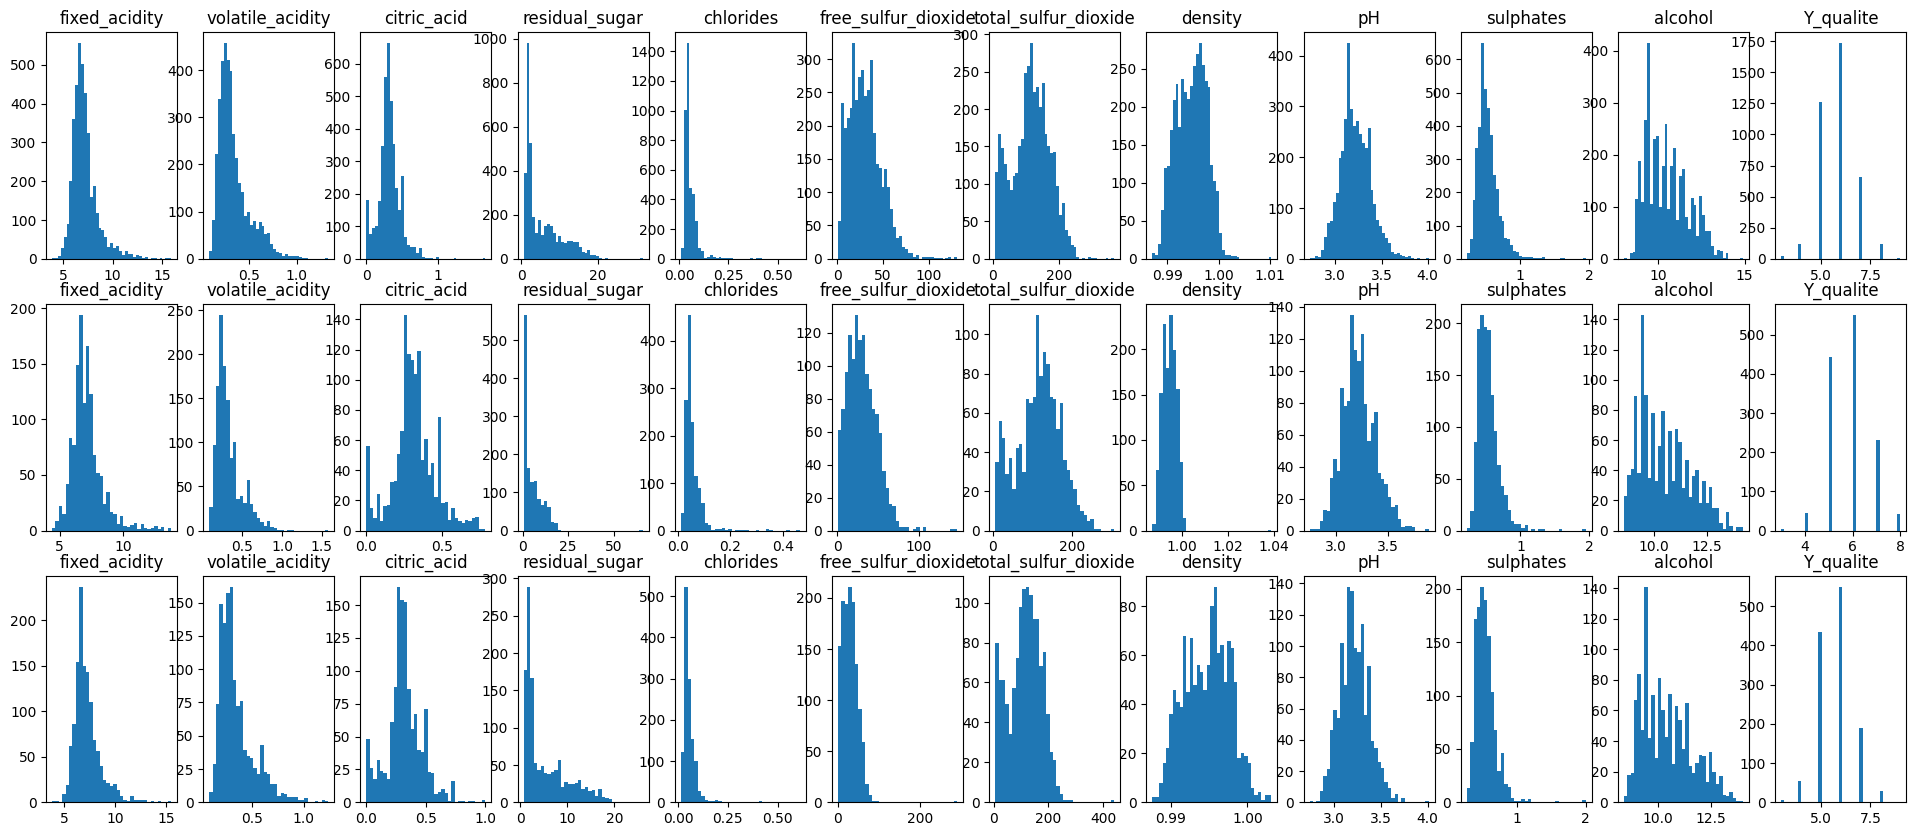

In [65]:
fig, axs = plt.subplots(3, train_without_id.shape[1], figsize=(24, 10))

for i, df in enumerate([train_without_id, valid_without_id, test_without_id]):
    for j in range(df.shape[1]):
        axs[i, j].hist(df.iloc[:, j], bins=int(5*np.log(len(df))))
        axs[i, j].set_title(df.columns[j])

plt.show()

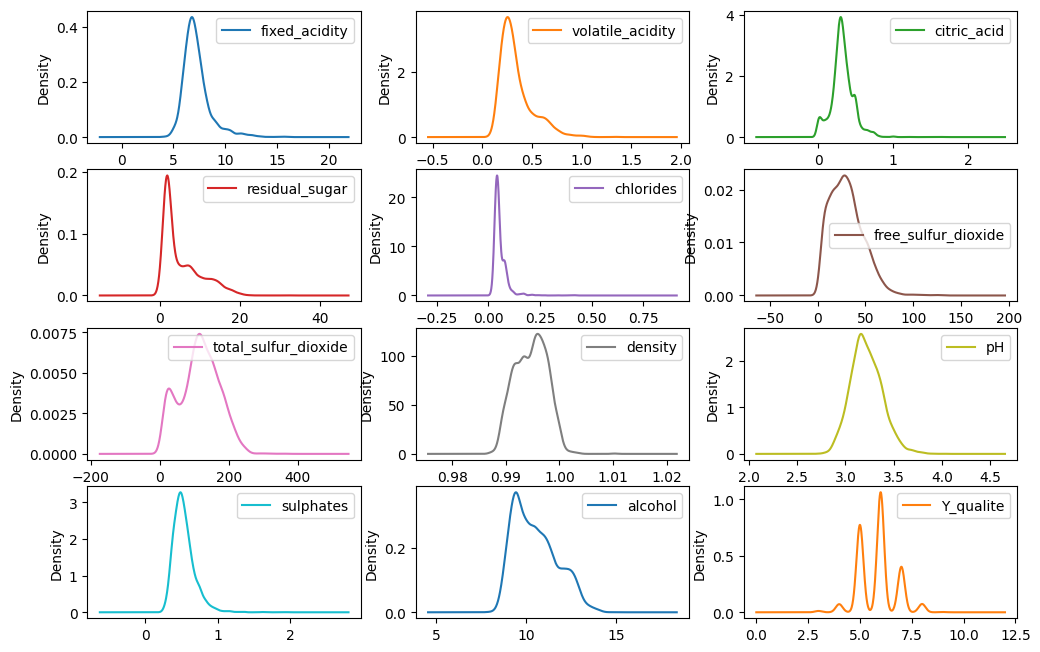

In [70]:
train_without_id.plot(kind='density', subplots=True, layout=(6,3), figsize=(12, 12), sharex=False)
plt.show()

# fig, axs = plt.subplots(3, train_without_id.shape[1], figsize=(18, 8)) 

# for i, df in enumerate([train_without_id, valid_without_id, test_without_id]):
#     df.plot(kind='density', subplots=True, layout=(1,train_without_id.shape[1]), figsize=(12, 12), sharex=False)

#     # for j in range(df.shape[1]):
#     #     axs[i, j].hist(df.iloc[:, j], bins=10)
#     #     axs[i, j].set_title(df.columns[j])

# plt.show()

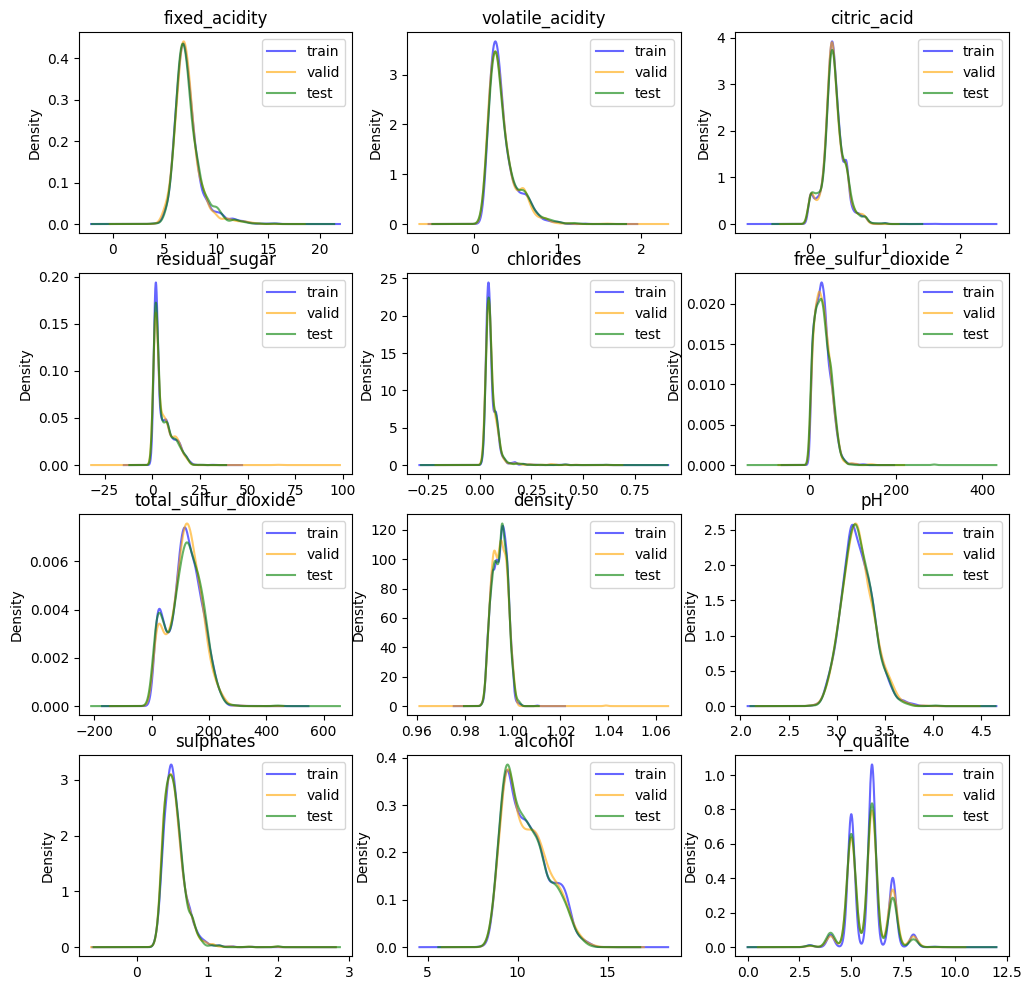

In [79]:
fig, axs = plt.subplots(len(train_without_id.columns)//3, 3, figsize=(12, 12))

colors = ['blue', 'orange', 'green']
labels = ['train', 'valid', 'test']
dfs = [train_without_id, valid_without_id, test_without_id]

for i, col_name in enumerate(train_without_id.columns):
    row_idx, col_idx = i//3, i%3
    axs[row_idx, col_idx].set_title(col_name)
    for j, df in enumerate(dfs):
        df[col_name].plot(kind='density', color=colors[j], ax=axs[row_idx, col_idx], alpha=0.6, label=labels[j])
    axs[row_idx, col_idx].legend()
    
plt.show()

<ipython-input-41-c0cab4a79a62>:1: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




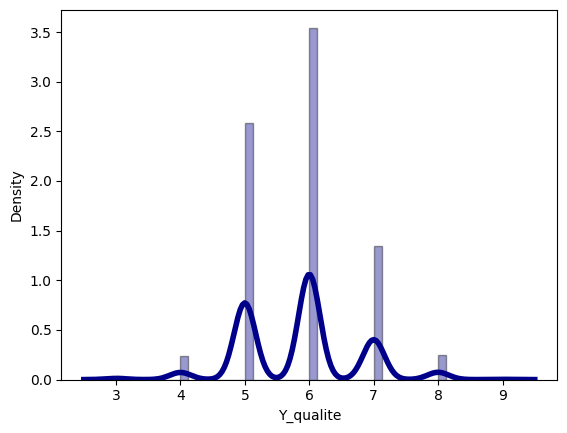

In [41]:
sns.distplot(train_without_id['Y_qualite'], hist=True, kde=True,
             bins='auto', color = 'darkblue',
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})
plt.show()

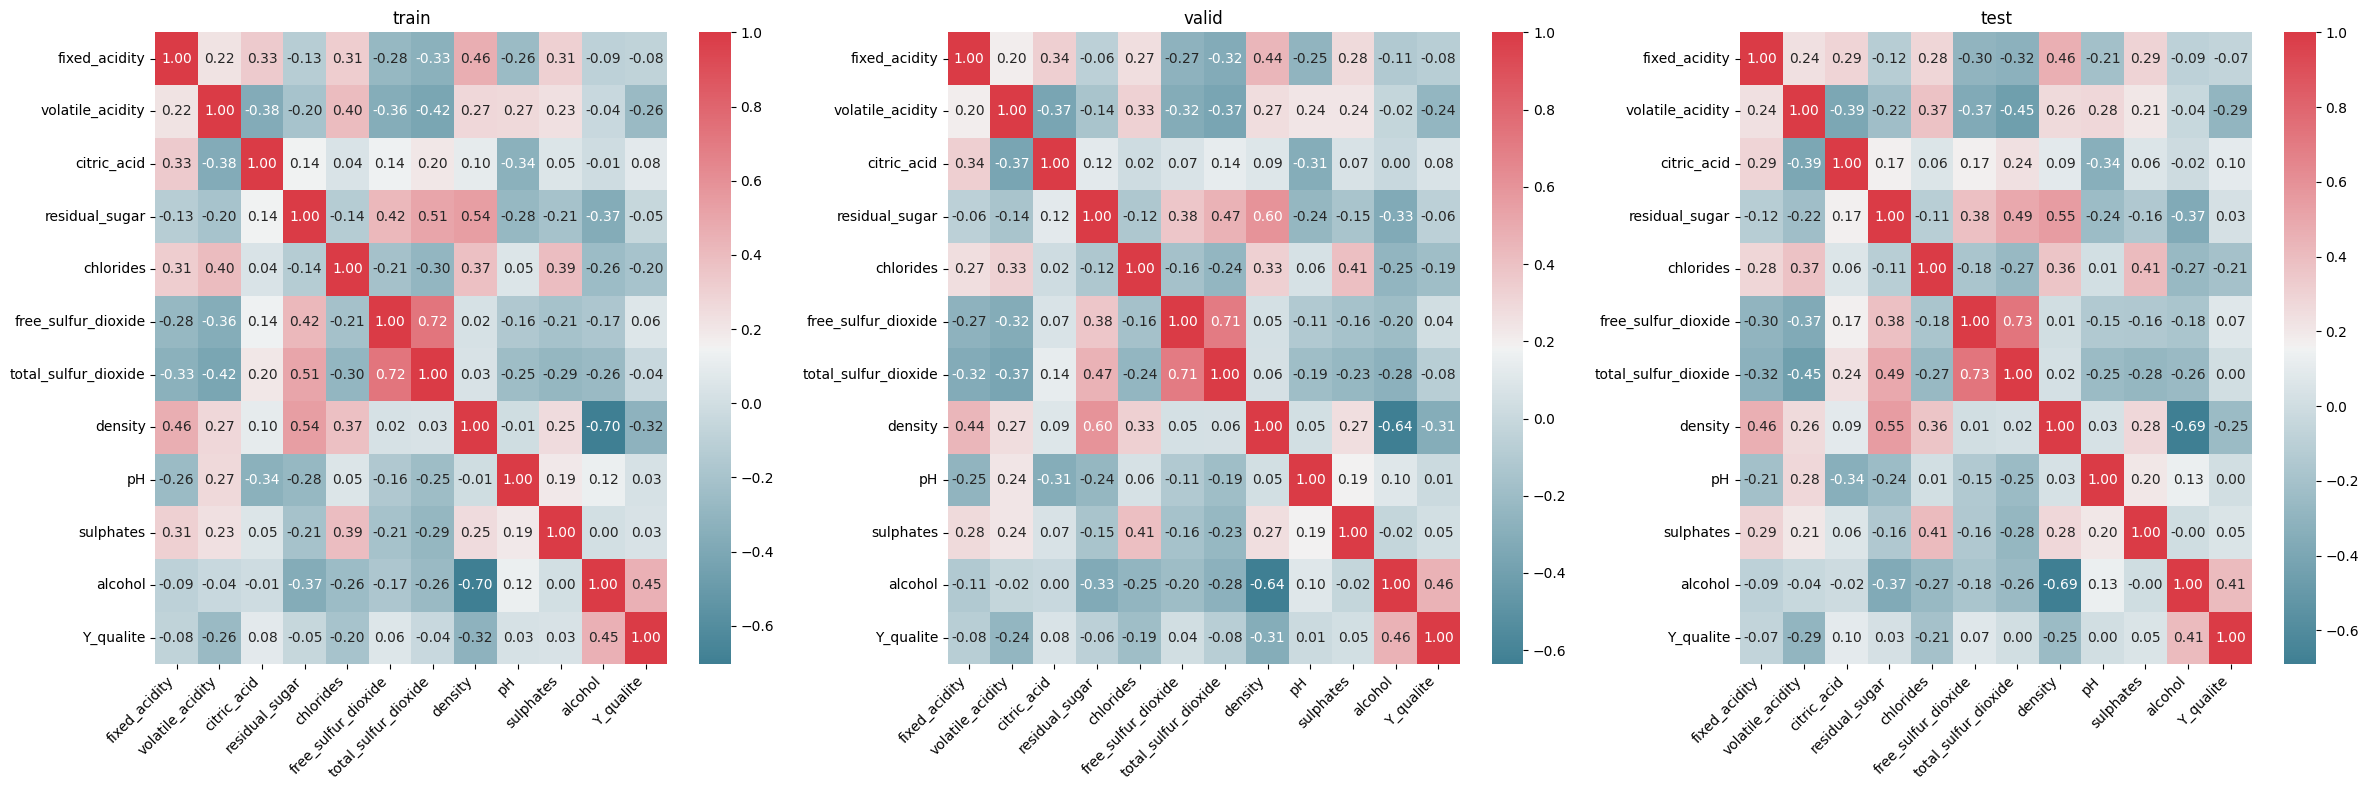

In [84]:
fig, axs = plt.subplots(1, 3, figsize=(24, 8))

dfs = [train_without_id, valid_without_id, test_without_id]
labels = ['train', 'valid', 'test']

for i, df in enumerate(dfs):
    correlations = df.corr()
    # Generate Color Map
    colormap = sns.diverging_palette(220, 10, as_cmap=True)
    # Generate Heat Map, allow annotations and place floats in map
    sns.heatmap(correlations, cmap=colormap, annot=True, fmt=".2f", ax=axs[i])
    axs[i].set_xticklabels(
        df.columns,
        rotation=45,
        horizontalalignment='right'
    )
    axs[i].set_yticklabels(df.columns)
    axs[i].set_title(labels[i])

plt.tight_layout()
plt.show()


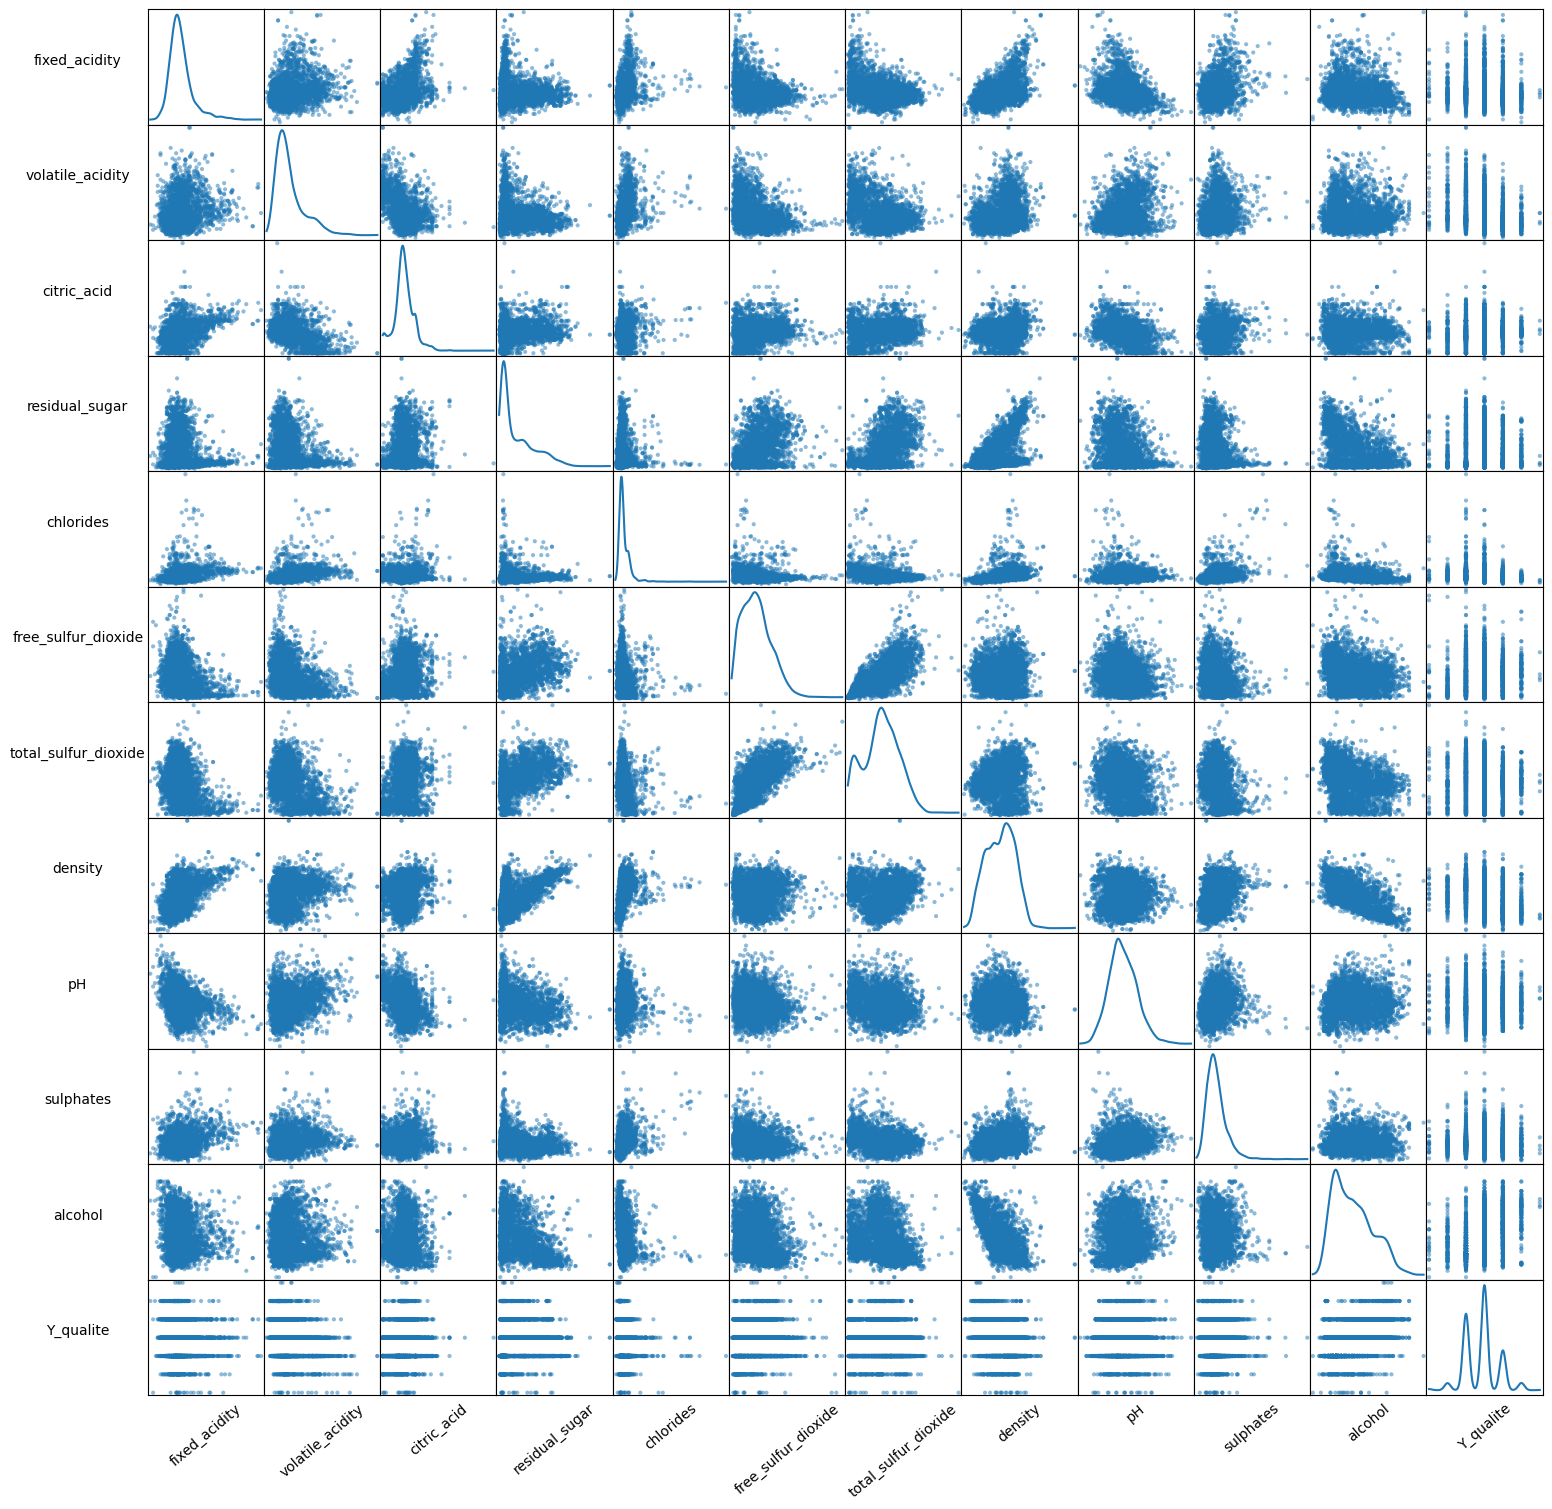

In [88]:
sm = scatter_matrix(train_without_id, figsize=(18, 18), diagonal='kde')
#Change label rotation
[s.xaxis.label.set_rotation(40) for s in sm.reshape(-1)]
[s.yaxis.label.set_rotation(0) for s in sm.reshape(-1)]
#May need to offset label when rotating to prevent overlap of figure
[s.get_yaxis().set_label_coords(-0.6,0.5) for s in sm.reshape(-1)]
#Hide all ticks
[s.set_xticks(()) for s in sm.reshape(-1)]
[s.set_yticks(()) for s in sm.reshape(-1)]
plt.show()